# Analyzing and Predicting Player Count Trends in Online Games

## Part 2: Exploratory Data Analysis

Now that we have dataframes that will be easier to analyze and work with, we can complete some EDA. We will be posing different queries and attempt to answer them with constructed visualizations. These queries are:

1. What game had the largest change in players over a defined period (week, month, year)?
2. Of all our dataframes, when is the single largest daily change in player base?
3. Is there a similar trend in the change in players across all games? If not, what does this suggest?
4. How does a larger player base impact volitility in number of players? 
5. How are number of players and viewers distributed?
6. How does an event affect number of players?

In [1]:
# we import necessary libraries

!pip install -U fsds

import statistics as stats
from fsds.imports import * 
from datetime import datetime

fsds v0.2.30 loaded.  Read the docs: https://fs-ds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


In [2]:
# we import our dataframes

csgo = pd.read_csv('data/Clean/csgo.csv', parse_dates = ['time'], index_col = 0)
dota = pd.read_csv('data/Clean/dota.csv')
rl = pd.read_csv('data/Clean/rl.csv')
tf = pd.read_csv('data/Clean/tf.csv')

ls = [csgo, dota, rl, tf]

ls = list(map(lambda df: df.drop(columns = "Unnamed: 0"), ls))

#ls[0].info()



# our time column did not import as a datetime object, so we have to complete this again. 

for df in ls:
    
    for i in range(len(df['time'])):
        t = df['time'][i]
        
        df['time'][i] = str(t).replace('-', '')
        
    df['time'] = pd.to_datetime(df['time'], format = '%Y%m%d')
    
        
        

In [3]:
dota

,Unnamed: 0,index,time,players,viewers,event,%chg_players,%chg_viewers
0,0,1197,2015-01-01,961737.0,0.0,0.0,0.000000,0.000000
1,1,1198,2015-01-02,878508.0,0.0,0.0,-0.086540,0.000000
2,2,1199,2015-01-03,835544.0,0.0,0.0,-0.048906,0.000000
3,3,1200,2015-01-04,770788.0,0.0,0.0,-0.077502,0.000000
4,4,1201,2015-01-05,844391.0,0.0,0.0,0.095491,0.000000
...,...,...,...,...,...,...,...,...
2190,2190,3387,2020-12-30,625344.0,71052.0,0.0,-0.007808,-0.052400
2191,2191,3388,2020-12-31,561914.0,60719.0,0.0,-0.101432,-0.145429
2192,2192,3389,2021-01-01,642032.0,57219.0,0.0,0.142581,-0.057643
2193,2193,3390,2021-01-02,694687.0,63547.0,0.0,0.082013,0.110593


In [4]:
rl

,Unnamed: 0,index,time,players,viewers,event,%chg_players,%chg_viewers
0,0,566,2015-07-27,27121.0,29828.0,0.0,0.000000,0.000000
1,1,567,2015-07-28,27692.0,14504.0,0.0,0.021054,-0.513745
2,2,568,2015-07-29,25574.0,25657.0,0.0,-0.076484,0.768960
3,3,569,2015-07-30,26082.0,20607.0,0.0,0.019864,-0.196827
4,4,570,2015-07-31,27188.0,44600.0,0.0,0.042405,1.164313
...,...,...,...,...,...,...,...,...
1983,1983,2549,2020-12-30,113708.0,89994.0,0.0,0.044151,-0.030811
1984,1984,2550,2020-12-31,88266.0,53390.0,0.0,-0.223749,-0.406738
1985,1985,2551,2021-01-01,102974.0,72013.0,0.0,0.166633,0.348811
1986,1986,2552,2021-01-02,109847.0,83405.0,0.0,0.066745,0.158194


### 1. Which games had the largest change in players over a week, month, and year?

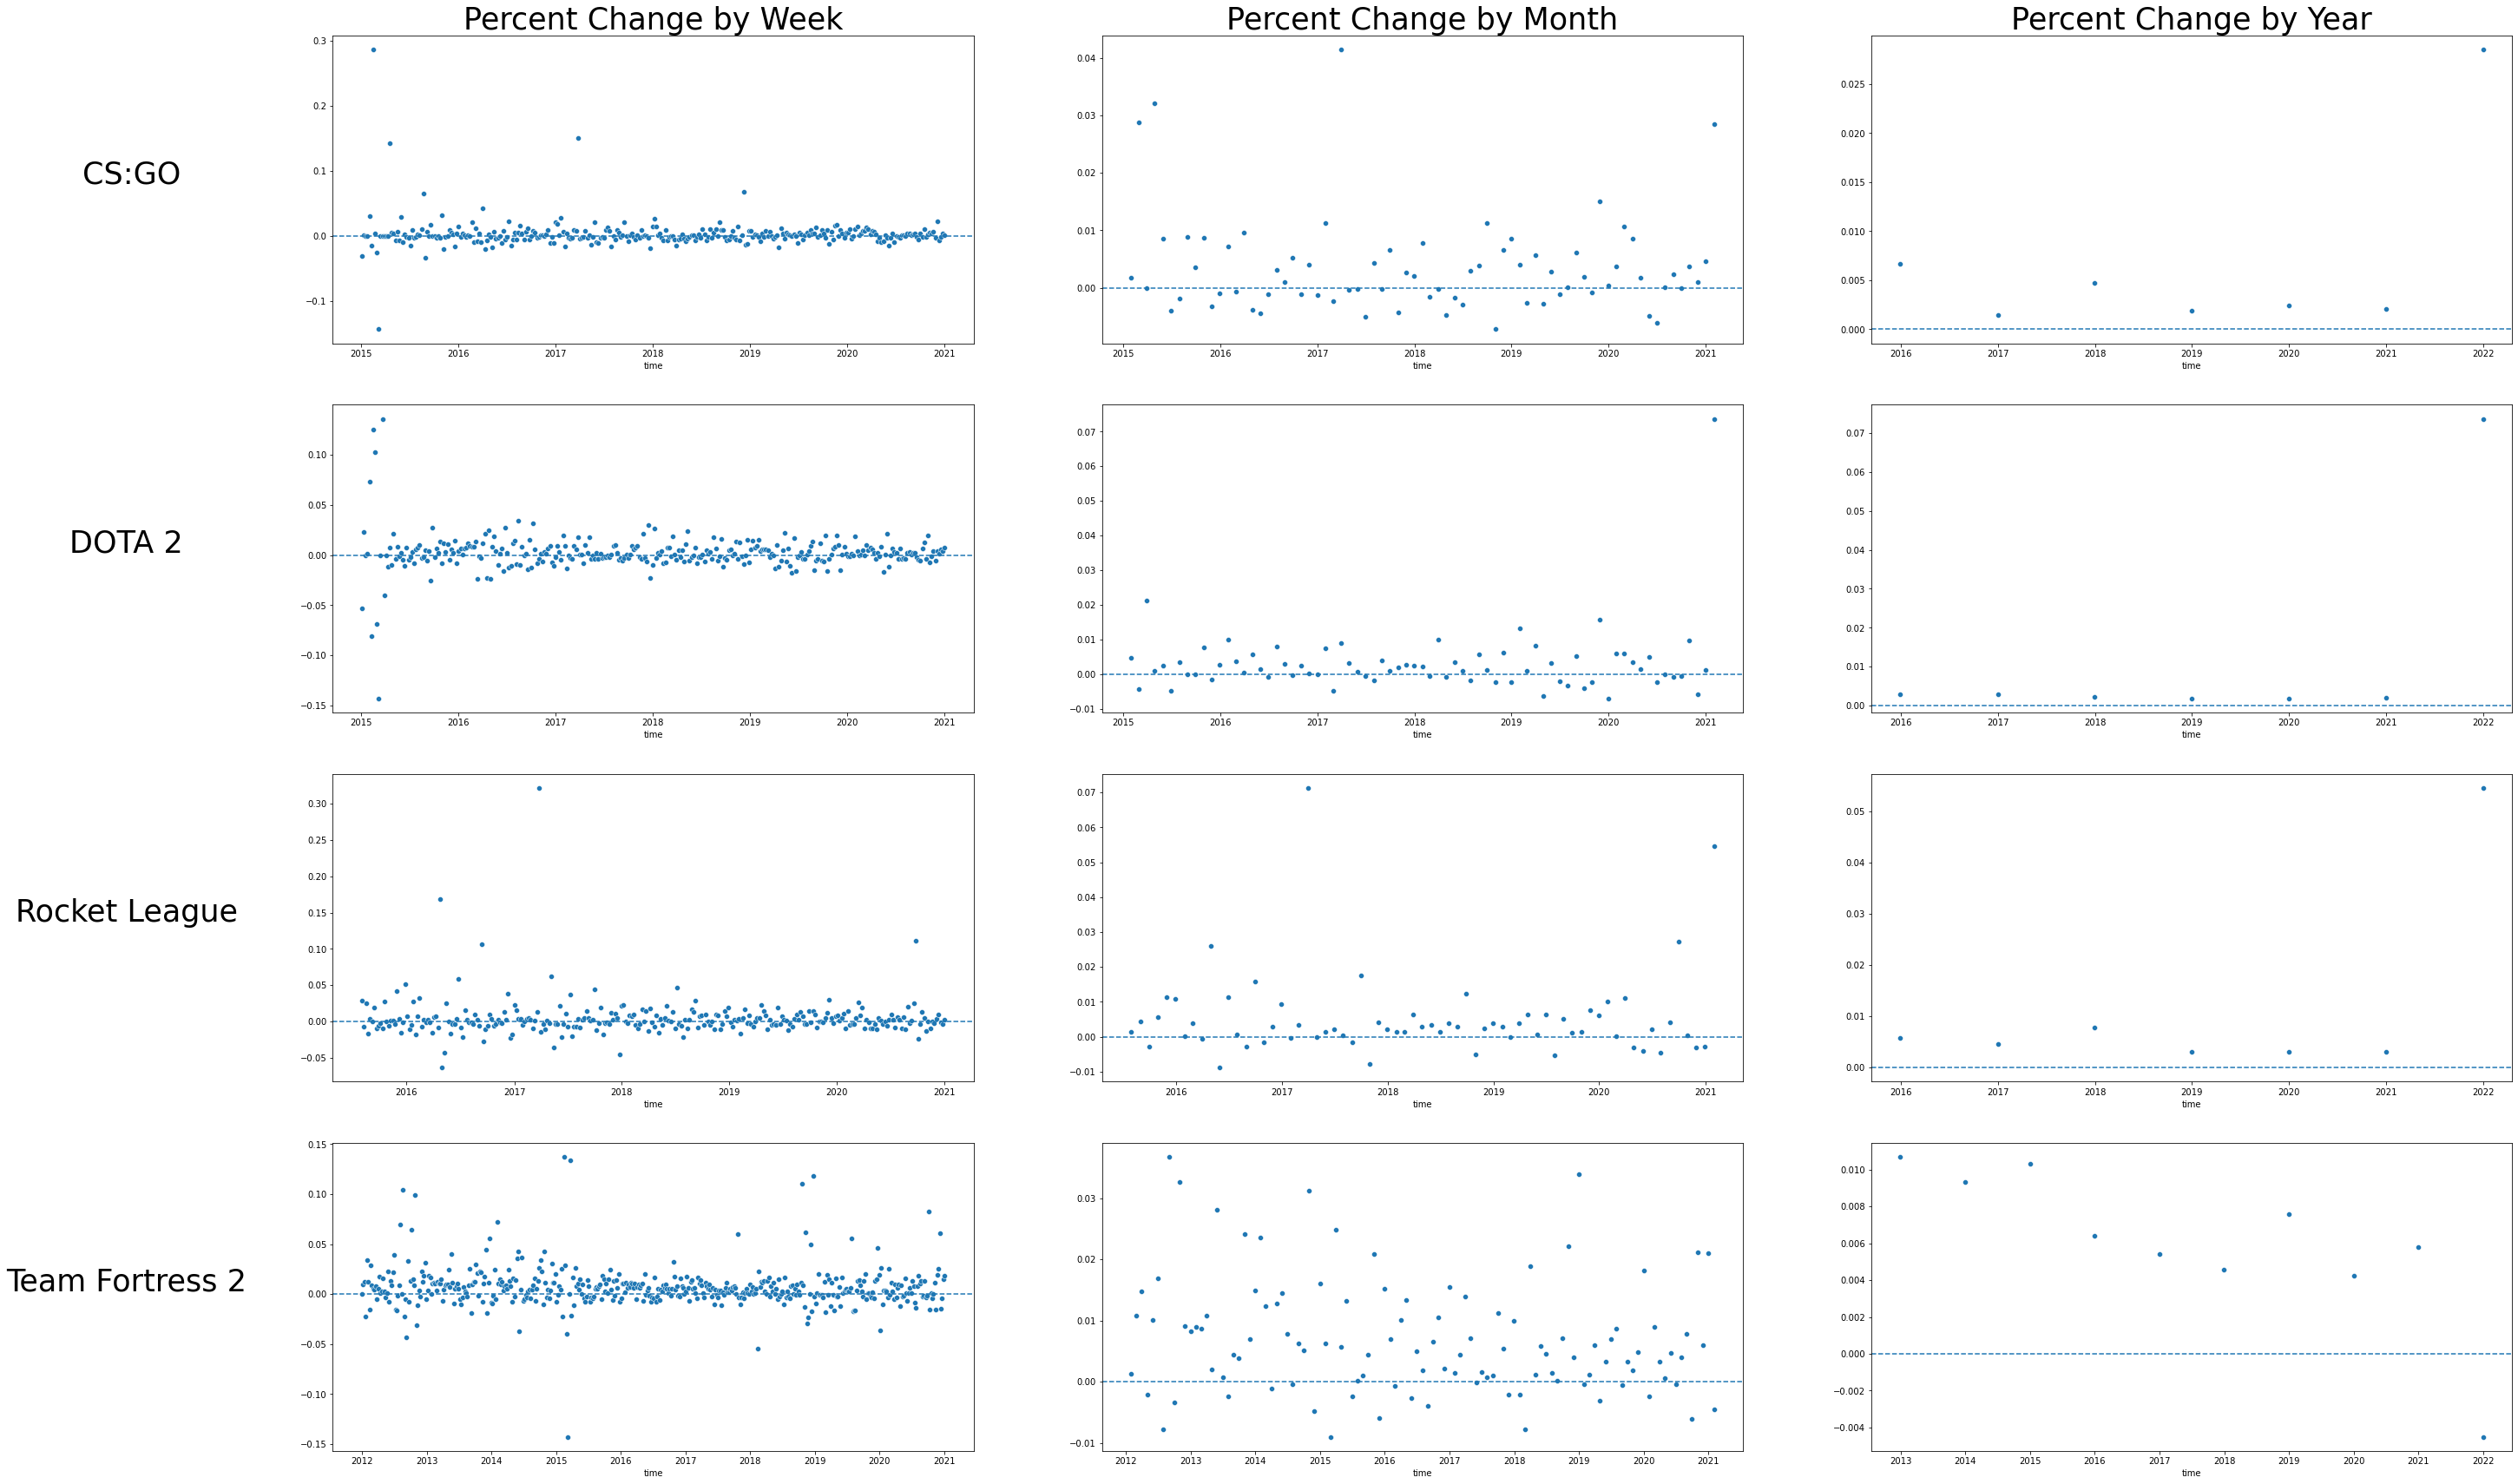

In [5]:
# we currently have daily percent changes, so we will have to calculate rolling averages for the 
# time periods above.

times = ['W', 'M', 'Y']


fig, axes = plt.subplots(ncols = 3, nrows = 4, figsize = (45, 30))

for i, df in enumerate(ls):
    for x, t  in enumerate(times):
        df_plot = df.groupby(pd.Grouper(key = 'time', freq = t)).mean()
        ax = sns.scatterplot(data = df_plot, x = 'time', y = '%chg_players', ax = axes[i][x])
        ax.axhline(0, ls = '--')
        #ax.set(title = 'Average change in players by ' + t, xlabel = 'Time', ylim = (-0.5, 0.5))
        
game_labels = ['CS:GO', 'DOTA 2', 'Rocket League', 'Team Fortress 2']
time_labels = ['Week', 'Month', 'Year']

for i, game in enumerate(game_labels):
    axes[i][0].set_ylabel(game, fontsize = 35, rotation = 0, labelpad = 200)
    axes[i][1].set(ylabel = '')
    axes[i][2].set(ylabel = '')
    
    
for i, time in enumerate(time_labels):
    axes[0][i].set_title('Percent Change by '+time, fontsize = 35)
    axes[1][i].set(title = '')
    axes[2][i].set(title = '')
    axes[3][i].set(title = '')


In [6]:
ls[0]

,index,time,players,viewers,event,%chg_players,%chg_viewers
0,1128,2015-01-01,443188.0,0.0,0.0,0.000000,0.000000
1,1129,2015-01-02,383943.0,0.0,0.0,-0.133679,0.000000
2,1130,2015-01-03,398639.0,0.0,0.0,0.038277,0.000000
3,1131,2015-01-04,389040.0,0.0,0.0,-0.024079,0.000000
4,1132,2015-01-05,376364.0,0.0,0.0,-0.032583,0.000000
...,...,...,...,...,...,...,...
2190,3318,2020-12-30,1056057.0,77815.0,0.0,0.021949,-0.075634
2191,3319,2020-12-31,982583.0,60120.0,0.0,-0.069574,-0.227398
2192,3320,2021-01-01,1020715.0,91532.0,0.0,0.038808,0.522488
2193,3321,2021-01-02,1079804.0,93678.0,0.0,0.057890,0.023445


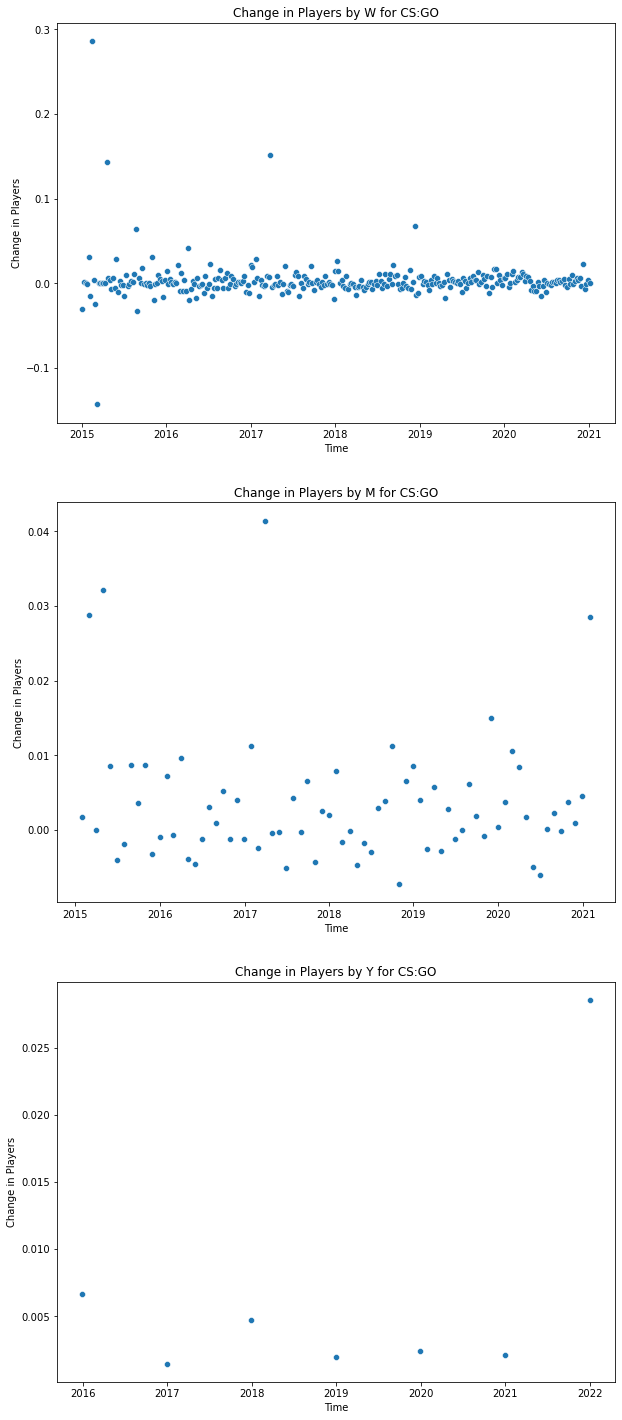

In [7]:
# expanding those graphs that have outliers, suggesting that these are our maximums. These graphs are [0,0], [0, 1], and 
# [0, 2] which are all 'csgo'. Why does this game have such random growth compared to other games?

fig, axes = plt.subplots(ncols = 1, nrows = 3, figsize = (10, 25))

df = ls[0]

for x, t in enumerate(times):
    df_plot = df.groupby(pd.Grouper(key = 'time', freq = t)).mean()
    ax = sns.scatterplot(data = df_plot, x = 'time', y = '%chg_players', ax = axes[x])
    ax.set(title = 'Change in Players by ' + t + ' for CS:GO', xlabel = 'Time', ylabel = 'Change in Players')
    

From our above visualizations, it appears that CSGO had the single largest change in player base halfway through 2012.

### 2. Of all our dataframes, when is the single largest daily change in player base?


In [8]:
# we will have to find the maximum change in both the positive and negative direction for each of our dataframes

maxes = list(map(lambda df: df['%chg_players'].max(), ls))
mins = list(map(lambda df: df['%chg_players'].min(), ls))

# this worked for our maximums, but our mins represent times at which these games were not available to players,
# so negative change is at -1.0 or -100%. Instead, we will filter out the instances where negative change is -1, letting us
# capture those times where the game was still active, but change in players was still at a negative maximum.

# we update the lambda function to filter out change of -1.0

mins = list(map(lambda df: df['%chg_players'].where(df['%chg_players'] != -1.0).min(), ls))

print(maxes, mins)

[3.033562988337631, 1.1942333901887654, 3.14021052631579, 1.7707582923544334] [-0.6020991012740455, -0.4661763028074878, -0.5461742145060464, -0.5278185918972794]


This still suggests that CS:GO has the largest change of all our games. What is is about CS:GO that prescribes such volatility? Let's hone in on these days where the change was so great. 

In [9]:
df_max_min = pd.DataFrame()

In [10]:

df_max_min = ls[0].where(ls[0]['%chg_players'] == maxes[0])
df_max_min = df_max_min.append(ls[0].where(ls[0]['%chg_players'] == mins[0]))


In [11]:
df_max_min.dropna()

,index,time,players,viewers,event,%chg_players,%chg_viewers
43,1171.0,2015-02-13,419184.0,0.0,0.0,3.033563,0.0
40,1168.0,2015-02-10,159873.0,0.0,0.0,-0.602099,0.0


It appears that this represents an enormous spike in players on 8-01-2012, but that of this spike only 3% were retained. 

Text(0, 0.5, 'Player Count')

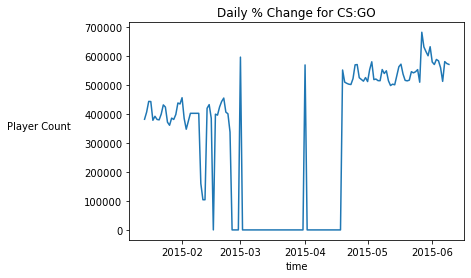

In [12]:
#visualizing the time period above, 30 days before and after. 

df_plot = ls[0].where(ls[0]['time'] > "2015-01-13")
df_plot = df_plot.where(df_plot['time'] < "2015-06-10")


plot = sns.lineplot(data = df_plot, y = 'players', x = 'time')
plot.set(title = 'Daily % Change for CS:GO')
plot.set_ylabel('Player Count', rotation = 0, labelpad = 45)



The spike in player count above is due to the release of CS:GO. This tells us that of all games we have data on, CS:GO had the most successful release, if player count is the primary measure of success. 

### 3. Is there a similar trend in the change in players across all games? If not, what does this suggest?

We will compare the changes in player counts that can be attributed to trends, such as more players being online during a weekend, or a particular time of year. We can find the correlation between players or % change in players.

In [13]:

# we can construct a correlation matrix from a joining of all our dataframes.
# we must be careful with the labels of our columns, adding suffixes to all.

csgo = ls[0]

#for col in csgo.columns

[(array(17532.), array(17539.)), (500000.0, 700000.0)]

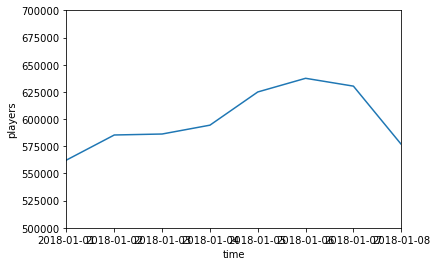

In [14]:


sns.lineplot(data = ls[0], x = ls[0]['time'], y = 'players').set(xlim = ("2018-01-01","2018-01-08"), ylim = (500000, 700000))

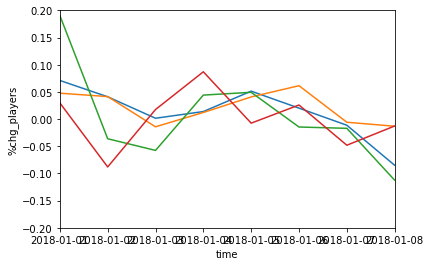

In [15]:
for df in ls:
    
    w = sns.lineplot(data = df, x ='time', y = '%chg_players').set(xlim = ("2018-01-01","2018-01-08"), ylim = (-0.2, 0.2))

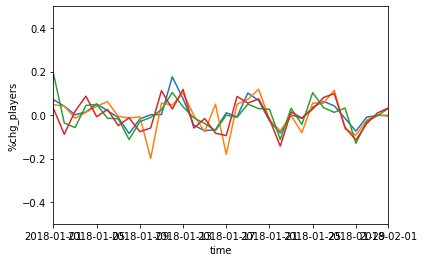

In [16]:
for df in ls:
    
    m = sns.lineplot(data = df, x ='time', y = '%chg_players').set(xlim = ("2018-01-01","2018-02-01"), ylim = (-.5, .5))
    

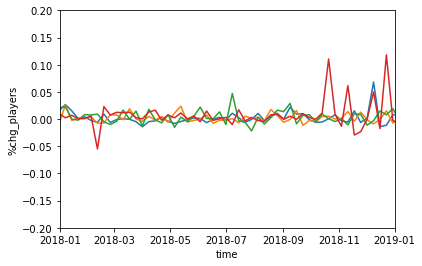

In [17]:
for df in ls:
    
    df_plot = df.groupby(pd.Grouper(key = 'time', freq = 'W')).mean()
    y = sns.lineplot(data = df_plot, x ='time', y = '%chg_players').set(xlim = ("2018-01-01","2019-01-01"), ylim = (-.2, .2))

### 4. How does a larger player base impact volitility in number of players? 


In [25]:
# we will be plotting number of players versus a statistical measure of volatility
# volatility is the square root of variance, so let us calculate weekly volatility and plot
# this versus number of players.

df = ls[0]

variances = []
week = []

for i in df['players']:
    
    week.append(i)
    
    if len(week) == 7:
        
        variances.append(stats.variance(week))
        week = []
        
if len(week) > 0:
    
    variances.append(stats.variance(week))
    

volatilities = []

for v in variances:
    
    # volatility is equal to sq_root of variance times sq_root of time period in question (one week)
    
    volatility = (v**0.5)*(7**0.5)
    volatilities.append(volatility)
    
len(volatilities)
    

314

In [32]:
df_plot = df.set_index('time')


df_plot.groupby(pd.Grouper(freq = 'W')).var()

,index,players,viewers,event,%chg_players,%chg_viewers
time,,,,,,
2015-01-04,1.666667,7.300568e+08,0.000000e+00,0.0,0.005449,0.000000
2015-01-11,4.666667,1.202218e+09,0.000000e+00,0.0,0.008137,0.000000
2015-01-18,4.666667,8.227279e+08,0.000000e+00,0.0,0.005651,0.000000
2015-01-25,4.666667,5.194852e+08,0.000000e+00,0.0,0.004438,0.000000
2015-02-01,4.666667,1.234837e+09,0.000000e+00,0.0,0.002253,0.000000
...,...,...,...,...,...,...
2020-12-06,4.666667,1.748817e+10,1.420753e+09,0.0,0.013194,0.027457
2020-12-13,4.666667,3.009274e+09,5.335675e+09,0.0,0.005963,0.097218
2020-12-20,4.666667,2.099077e+09,6.097323e+09,0.0,0.002490,0.335020


<AxesSubplot:xlabel='players'>

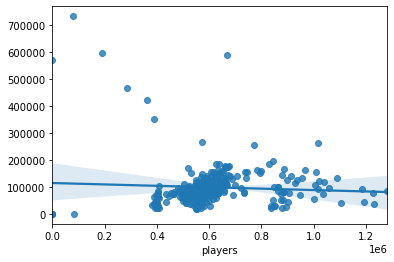

In [19]:
# now we group our dataframe weekly by average player count

df_plot = df.groupby(pd.Grouper(key = 'time', freq = 'W')).mean()
len(df_plot)

sns.regplot(x = df_plot['players'], y = volatilities)

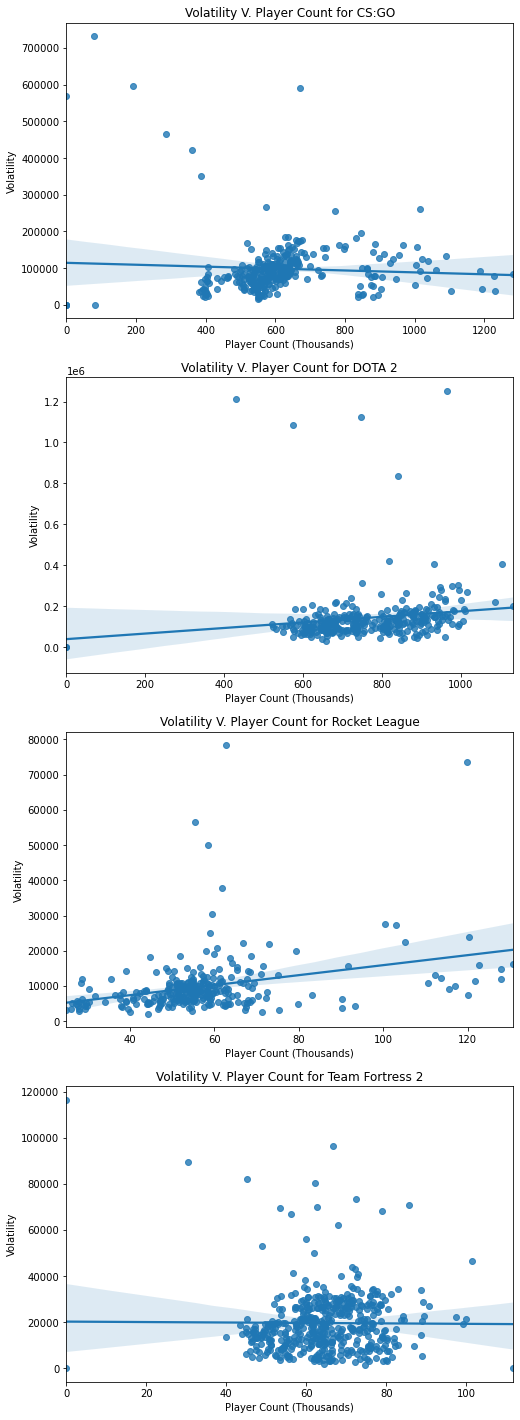

In [20]:
# might this vary by game?

fig, axes = plt.subplots(ncols = 1, nrows = 4, figsize = (8, 25))

for x, df in enumerate(ls):
    variances = []
    week = []

    for i in df['players']:
    
        week.append(i)
    
        if len(week) == 7:
        
            variances.append(stats.variance(week))
            week = []
        
    if len(week) > 1:
    
        variances.append(stats.variance(week))
    elif len(week) == 1:
        variances.append(0)
    

    volatilities = []

    for v in variances:
    
        # volatility is equal to sq_root of variance times sq_root of time period in question (one week)
    
        volatility = (v**0.5)*(7**0.5)
        volatilities.append(volatility)
        
    df_plot = df.groupby(pd.Grouper(key = 'time', freq = 'W')).mean()
    len(df_plot)

    ax = sns.regplot(x = df_plot['players']/1000, y = volatilities, ax = axes[x])
    ax.set_ylabel('Volatility')
    ax.set(title = "Volatility V. Player Count for " + game_labels[x], xlabel = "Player Count (Thousands)")
    

### 5. How are number of players and number of viewers distributed among our games?
We expect players to be normally distributed, while viewers may have a less normal distribution. 

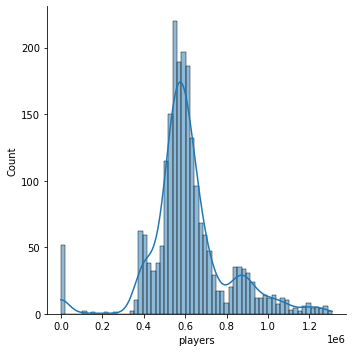

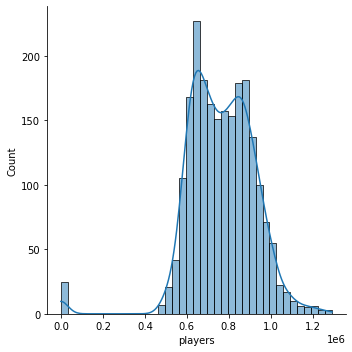

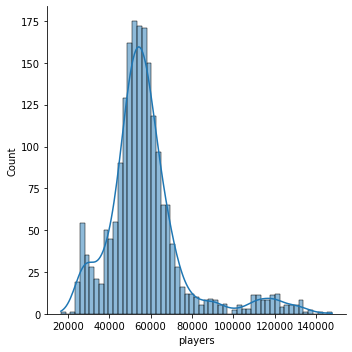

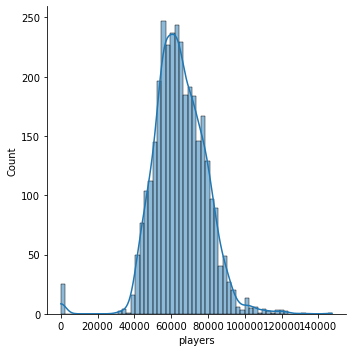

In [21]:
for df in ls:
    sns.displot(df['players'], kde = True)

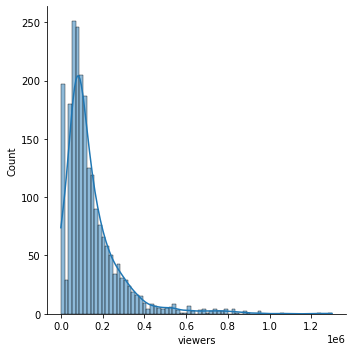

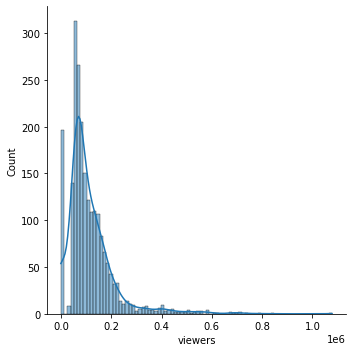

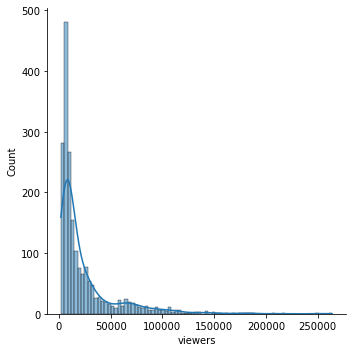

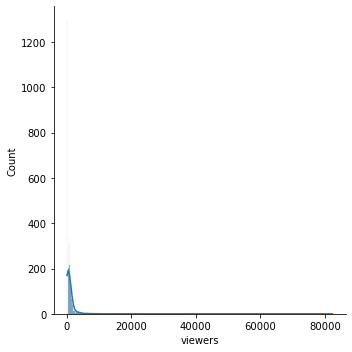

In [22]:
for df in ls:
    sns.displot(df['viewers'], kde = True)

### 6. How does an event affect number of players?
We will compare average number of players during an event versus other times. 

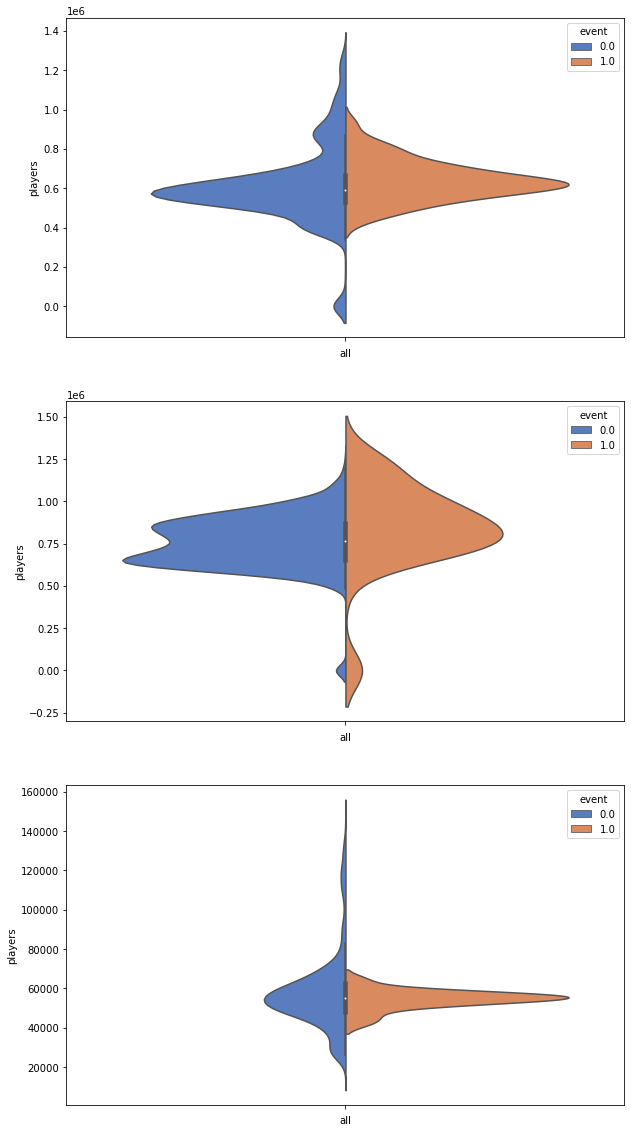

In [23]:
# a violin plot would compare counts during vs outside of events. 

fig, axes = plt.subplots(ncols = 1, nrows = 3, figsize = (10, 20))

for n, df in enumerate(ls[0:3]):
    
    df['all'] = ''
    
    ax = sns.violinplot(x = 'all', y="players", hue=df["event"],
                    data=df, palette="muted", split=True, ax = axes[n])
    
# this code is unable to violin plot Team Fortress 2 because this game does not have
# events, as detailed in our introduction. 

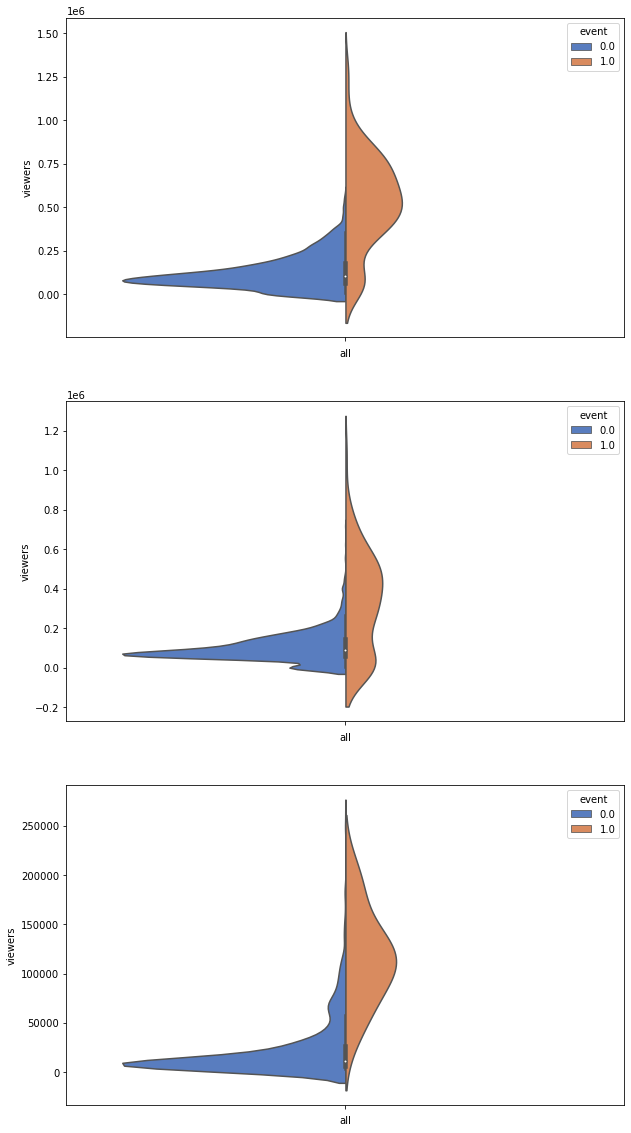

In [24]:
# and how does event affect viewers? Expected more than players

fig, axes = plt.subplots(ncols = 1, nrows = 3, figsize = (10, 20))

for n, df in enumerate(ls[0:3]):
    
    df['all'] = ''
    
    ax = sns.violinplot(x = 'all', y="viewers", hue=df["event"],
                    data=df, palette="muted", split=True, ax = axes[n])